In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [2]:
def process_adoption_data(folder_name):
    datapath = f"../data/{folder_name}/"
    data = pd.read_csv(f"{datapath}/results.csv")

    with open(f"{datapath}/parameters.txt", 'r') as file:
        parameters = file.read()
        print(parameters)

    grouped_data = data.groupby(['Trial', 'agent', 'timestep'])
    
    def all_items_adopted(group):
        return group['adopted'].all()
    
    adopted_all_items = grouped_data.apply(all_items_adopted)
    adopted_all_items = adopted_all_items.reset_index(name='all_adopted')
    
    summary_data = adopted_all_items.groupby(['Trial', 'timestep']).all_adopted.sum().reset_index(name='whole_adopted')
    total_agents = data['agent'].nunique()
    summary_data['whole_adoption_ratio'] = summary_data['whole_adopted'] / total_agents
    
    max_timestep = summary_data['timestep'].max()
    adjusted_data = pd.DataFrame()
    
    for trial in summary_data['Trial'].unique():
        trial_data = summary_data[summary_data['Trial'] == trial]
        last_timestep = trial_data['timestep'].max()
        if last_timestep < max_timestep:
            additional_rows = pd.DataFrame({
                'Trial': trial,
                'timestep': range(last_timestep + 1, max_timestep + 1),
                'whole_adopted': trial_data.iloc[-1]['whole_adopted'],
                'whole_adoption_ratio': trial_data.iloc[-1]['whole_adoption_ratio']
            })
            trial_data = pd.concat([trial_data, additional_rows], ignore_index=True)
        
        adjusted_data = pd.concat([adjusted_data, trial_data], ignore_index=True)
    
    average_adjusted_adoption_data = adjusted_data.groupby('timestep').whole_adoption_ratio.mean().reset_index()
    return average_adjusted_adoption_data

# Using the function for each folder and assigning the result to variables
folders = ["linear_10stories", "linear_20stories", "linear_30stories",
           "binary_10stories", "binary_20stories", "binary_30stories",
           "ternary_10stories", "ternary_20stories", "ternary_30stories",
           "star_10stories", "star_20stories", "star_30stories",
           "random_10_03", "random_20_03", "random_30_03",
           "random_10_05", "random_20_05", "random_30_05",
           "random_10_07", "random_20_07", "random_30_07"]

for folder in folders:
    variable_name = f"{folder}_data"
    globals()[variable_name] = process_adoption_data(folder)



alpha=0.4
beta=2.0
gamma=0.3
I_scale=0.2
x_0=5.0
x_s=0.9
filestub=reveal_test_one
seed=0
N=1000
R=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

alpha=0.4
beta=2.0
gamma=0.3
I_scale=0.2
x_0=5.0
x_s=0.9
filestub=reveal_test_one
seed=0
N=1000
R=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

alpha=0.4
beta=2.0
gamma=0.3
I_scale=0.2
x_0=5.0
x_s=0.9
filestub=reveal_test_one
seed=0
N=1000
R=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

alpha=0.4
beta=2.0
gamma=0.3
I_scale=0.2
x_0=5.0
x_s=0.9
filestub=reveal_test_one
seed=0
N=1000
R=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

alpha=0.4
beta=2.0
gamma=0.3
I_scale=0.2
x_0=5.0
x_s=0.9
filestub=reveal_test_one
seed=0
N=1000
R=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

alpha=0.4
beta=2.0
gamma=0.3
I_scale=0.2
x_0=5.0
x_s=0.9
filestub=reveal_test_one
seed=0
N=1000
R=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

alpha=0.4
beta=2.0
gamma=0.3
I_scale=0.2

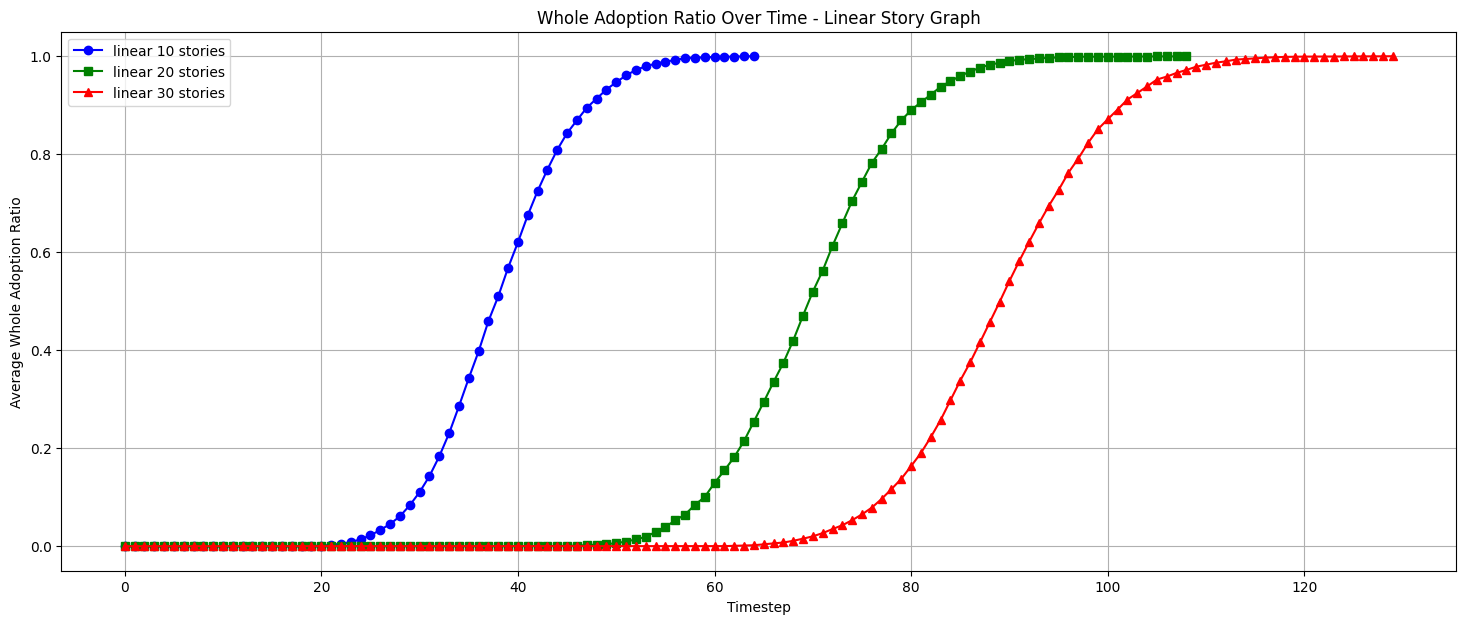

In [3]:
plt.figure(figsize=(18, 7))

plt.plot(linear_10stories_data['timestep'], 
         linear_10stories_data['whole_adoption_ratio'], 
         marker='o', color='blue', label='linear 10 stories')

plt.plot(linear_20stories_data['timestep'], 
         linear_20stories_data['whole_adoption_ratio'], 
         marker='s', color='green', label='linear 20 stories')

plt.plot(ternary_30stories_data['timestep'], 
         ternary_30stories_data['whole_adoption_ratio'], 
         marker='^', color='red', label='linear 30 stories')

plt.title('Whole Adoption Ratio Over Time - Linear Story Graph')
plt.xlabel('Timestep')
plt.ylabel('Average Whole Adoption Ratio')
plt.grid(True)
plt.legend()
plt.show()

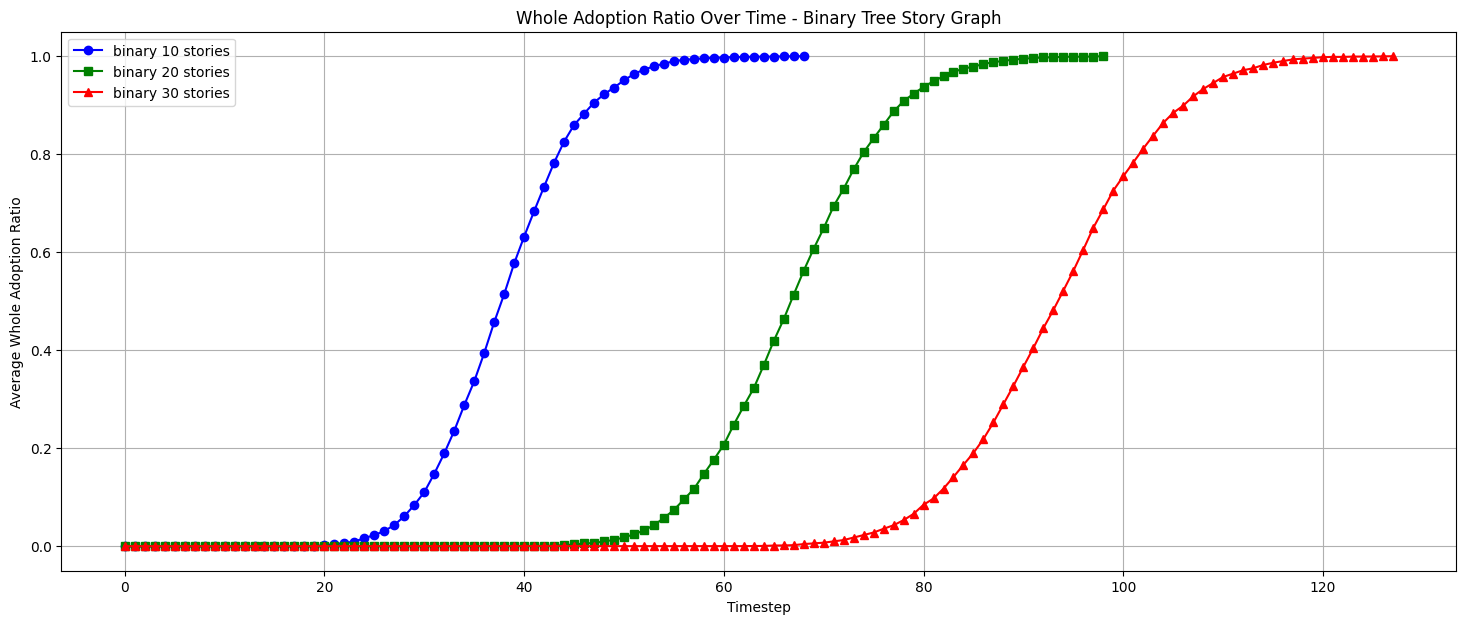

In [4]:
plt.figure(figsize=(18, 7))

plt.plot(binary_10stories_data['timestep'], 
         binary_10stories_data['whole_adoption_ratio'], 
         marker='o', color='blue', label='binary 10 stories')

plt.plot(binary_20stories_data['timestep'], 
         binary_20stories_data['whole_adoption_ratio'], 
         marker='s', color='green', label='binary 20 stories')

plt.plot(binary_30stories_data['timestep'], 
         binary_30stories_data['whole_adoption_ratio'], 
         marker='^', color='red', label='binary 30 stories')

plt.title('Whole Adoption Ratio Over Time - Binary Tree Story Graph')
plt.xlabel('Timestep')
plt.ylabel('Average Whole Adoption Ratio')
plt.grid(True)
plt.legend()  # This adds the legend to the plot
plt.show()


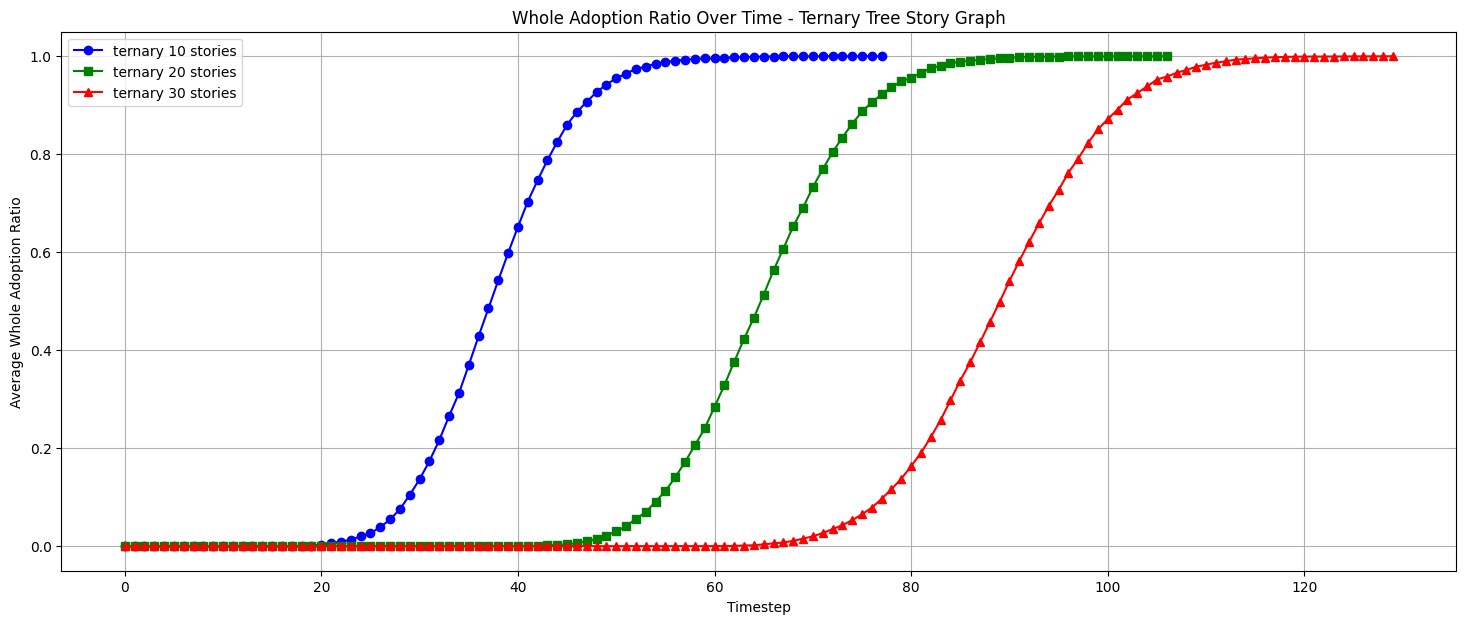

In [5]:
plt.figure(figsize=(18, 7))

plt.plot(ternary_10stories_data['timestep'], 
         ternary_10stories_data['whole_adoption_ratio'], 
         marker='o', color='blue', label='ternary 10 stories')

plt.plot(ternary_20stories_data['timestep'], 
         ternary_20stories_data['whole_adoption_ratio'], 
         marker='s', color='green', label='ternary 20 stories')

plt.plot(ternary_30stories_data['timestep'], 
         ternary_30stories_data['whole_adoption_ratio'], 
         marker='^', color='red', label='ternary 30 stories')

plt.title('Whole Adoption Ratio Over Time - Ternary Tree Story Graph')
plt.xlabel('Timestep')
plt.ylabel('Average Whole Adoption Ratio')
plt.grid(True)
plt.legend()  # This adds the legend to the plot
plt.show()

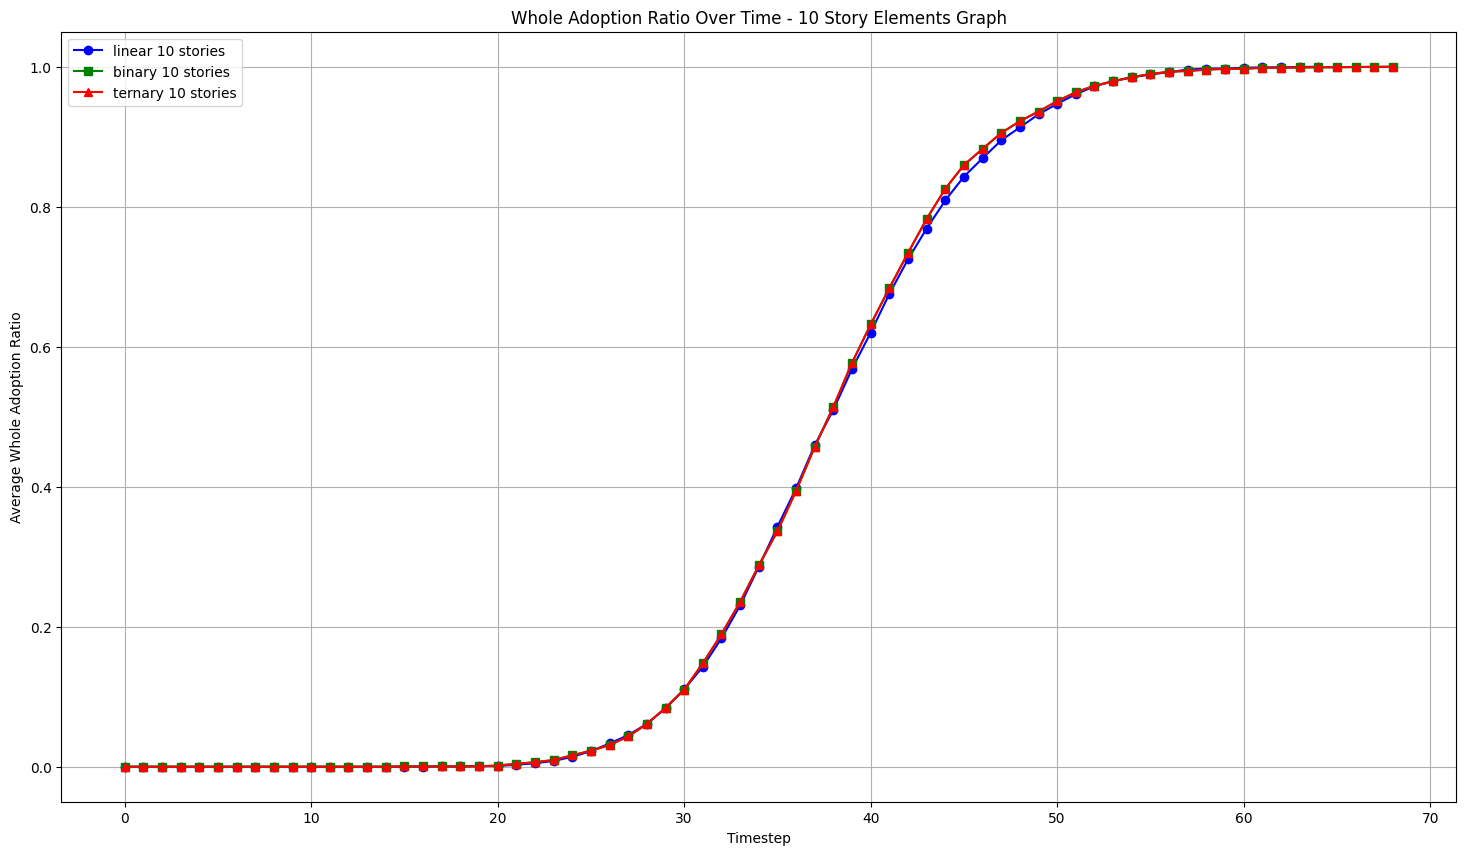

In [6]:
plt.figure(figsize=(18, 10))

plt.plot(linear_10stories_data['timestep'], 
         linear_10stories_data['whole_adoption_ratio'], 
         marker='o', color='blue', label='linear 10 stories')

plt.plot(binary_10stories_data['timestep'], 
         binary_10stories_data['whole_adoption_ratio'], 
         marker='s', color='green', label='binary 10 stories')

plt.plot(binary_10stories_data['timestep'], 
         binary_10stories_data['whole_adoption_ratio'], 
         marker='^', color='red', label='ternary 10 stories')

plt.title('Whole Adoption Ratio Over Time - 10 Story Elements Graph')
plt.xlabel('Timestep')
plt.ylabel('Average Whole Adoption Ratio')
plt.grid(True)
plt.legend()  # This adds the legend to the plot
plt.show()

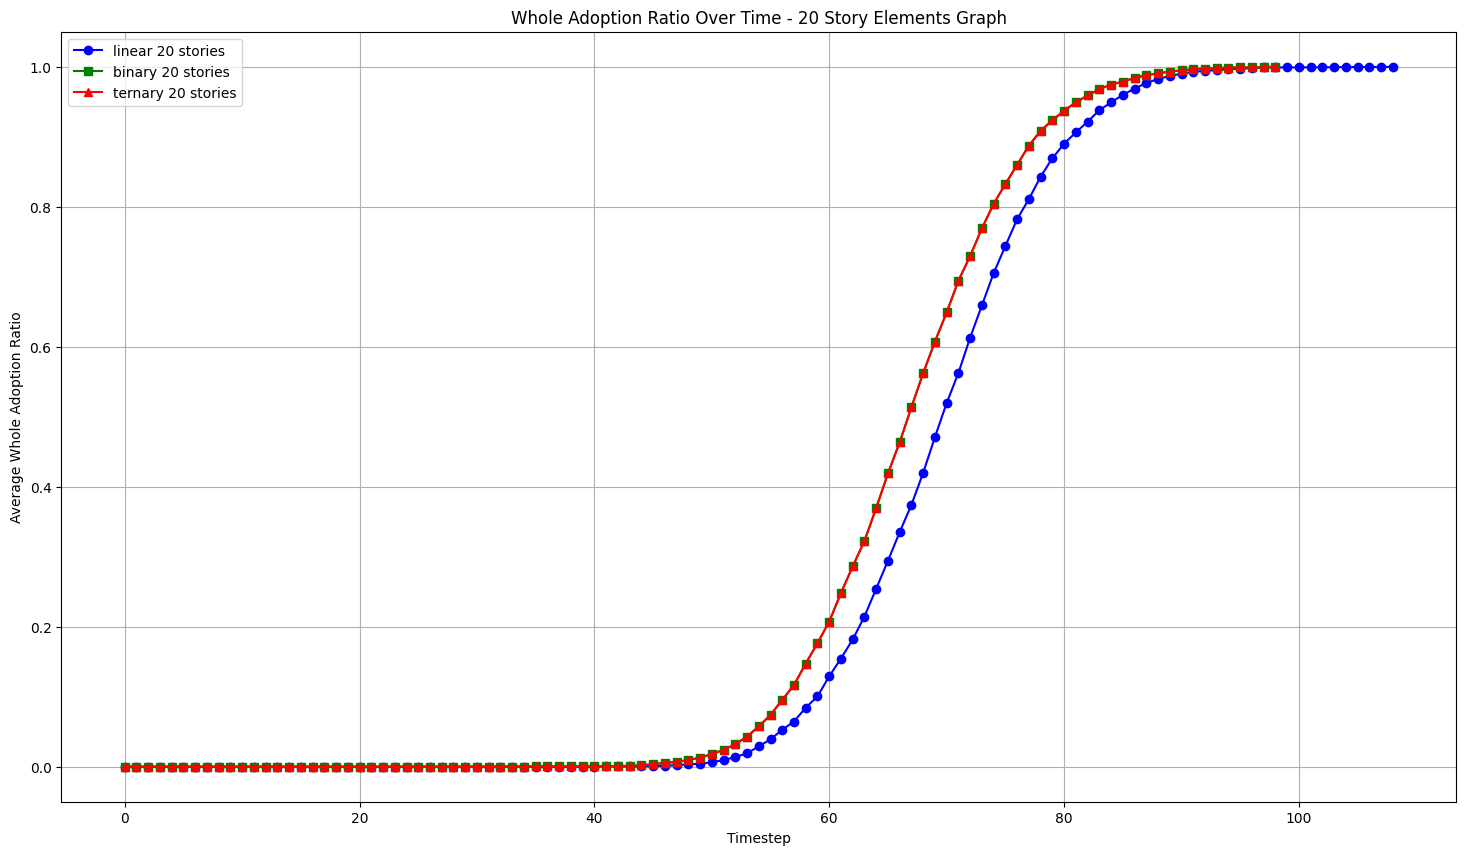

In [7]:
plt.figure(figsize=(18, 10))

plt.plot(linear_20stories_data['timestep'], 
         linear_20stories_data['whole_adoption_ratio'], 
         marker='o', color='blue', label='linear 20 stories')

plt.plot(binary_20stories_data['timestep'], 
         binary_20stories_data['whole_adoption_ratio'], 
         marker='s', color='green', label='binary 20 stories')

plt.plot(binary_20stories_data['timestep'], 
         binary_20stories_data['whole_adoption_ratio'], 
         marker='^', color='red', label='ternary 20 stories')

plt.title('Whole Adoption Ratio Over Time - 20 Story Elements Graph')
plt.xlabel('Timestep')
plt.ylabel('Average Whole Adoption Ratio')
plt.grid(True)
plt.legend()  # This adds the legend to the plot
plt.show()

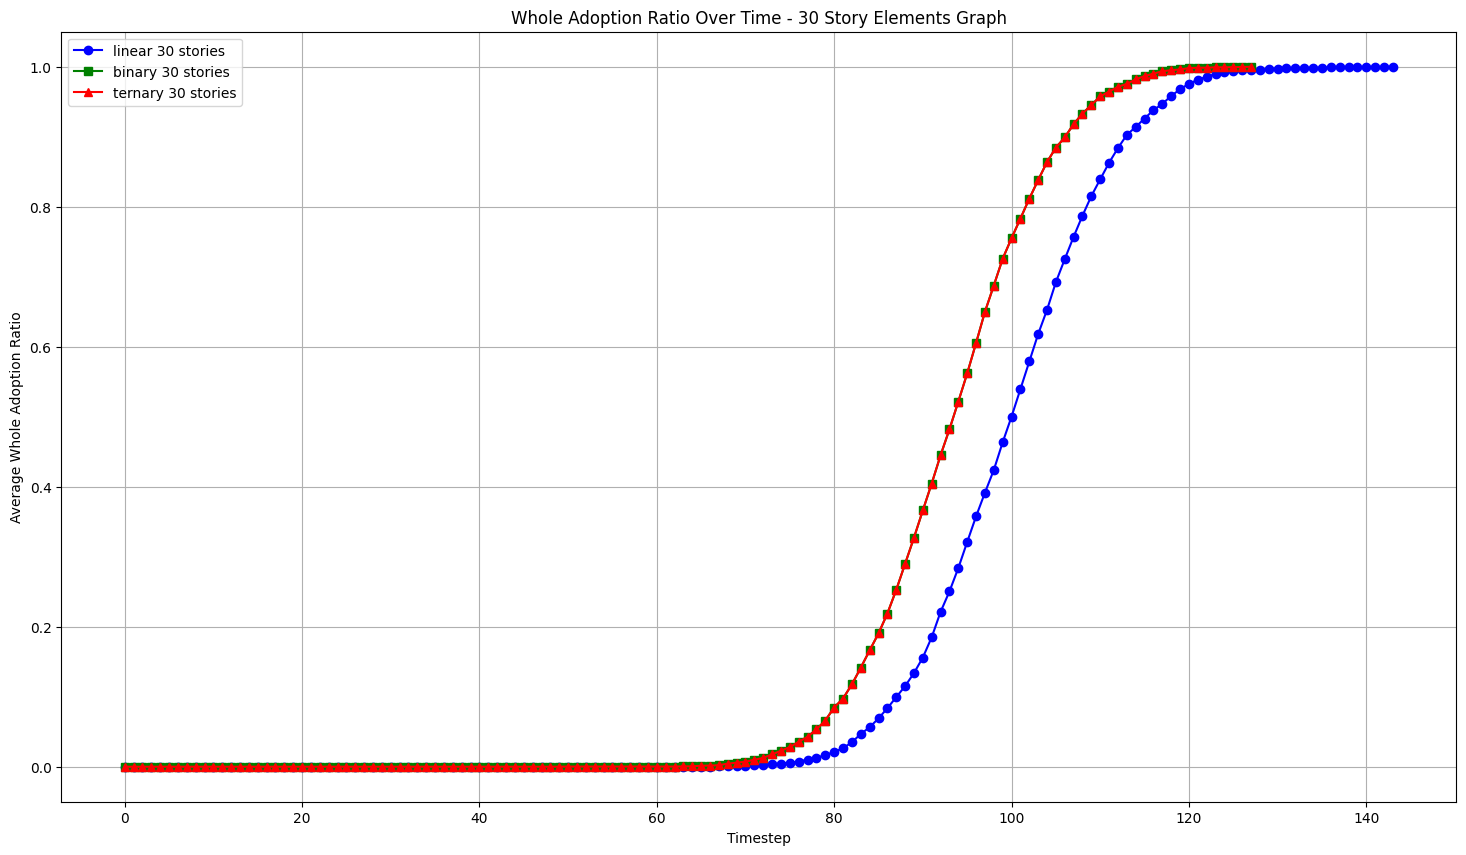

In [8]:
plt.figure(figsize=(18, 10))

plt.plot(linear_30stories_data['timestep'], 
         linear_30stories_data['whole_adoption_ratio'], 
         marker='o', color='blue', label='linear 30 stories')

plt.plot(binary_30stories_data['timestep'], 
         binary_30stories_data['whole_adoption_ratio'], 
         marker='s', color='green', label='binary 30 stories')

plt.plot(binary_30stories_data['timestep'], 
         binary_30stories_data['whole_adoption_ratio'], 
         marker='^', color='red', label='ternary 30 stories')

plt.title('Whole Adoption Ratio Over Time - 30 Story Elements Graph')
plt.xlabel('Timestep')
plt.ylabel('Average Whole Adoption Ratio')
plt.grid(True)
plt.legend()  # This adds the legend to the plot
plt.show()

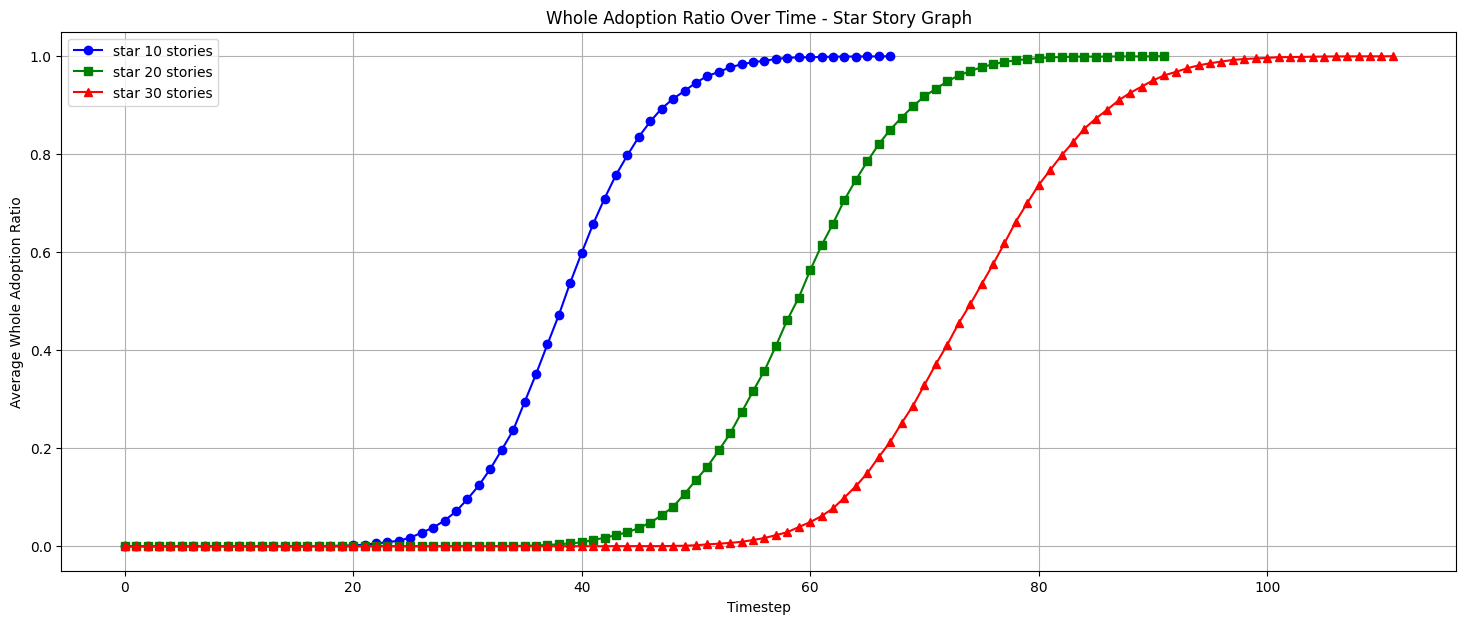

In [9]:
plt.figure(figsize=(18, 7))

plt.plot(star_10stories_data['timestep'], 
         star_10stories_data['whole_adoption_ratio'], 
         marker='o', color='blue', label='star 10 stories')

plt.plot(star_20stories_data['timestep'], 
         star_20stories_data['whole_adoption_ratio'], 
         marker='s', color='green', label='star 20 stories')

plt.plot(star_30stories_data['timestep'], 
         star_30stories_data['whole_adoption_ratio'], 
         marker='^', color='red', label='star 30 stories')

plt.title('Whole Adoption Ratio Over Time - Star Story Graph')
plt.xlabel('Timestep')
plt.ylabel('Average Whole Adoption Ratio')
plt.grid(True)
plt.legend()  # This adds the legend to the plot
plt.show()

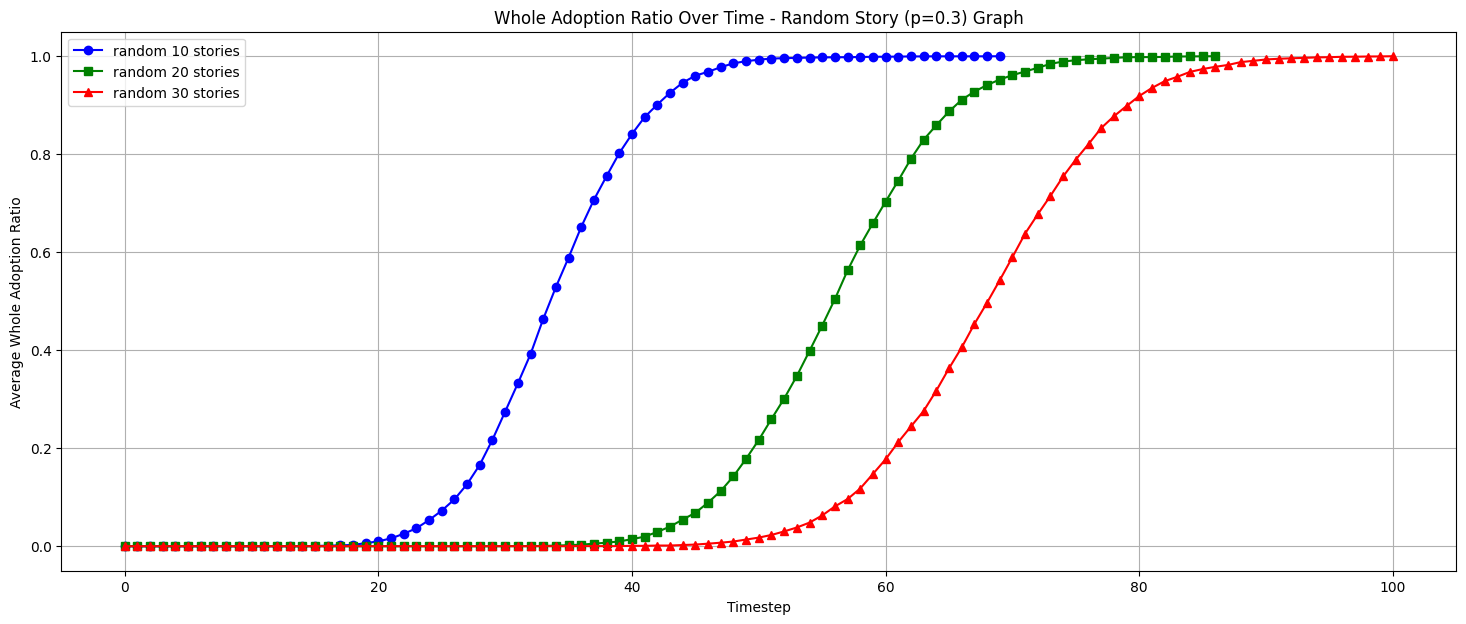

In [10]:
plt.figure(figsize=(18, 7))

plt.plot(random_10_03_data['timestep'], 
         random_10_03_data['whole_adoption_ratio'], 
         marker='o', color='blue', label='random 10 stories')

plt.plot(random_20_03_data['timestep'], 
         random_20_03_data['whole_adoption_ratio'], 
         marker='s', color='green', label='random 20 stories')

plt.plot(random_30_03_data['timestep'], 
         random_30_03_data['whole_adoption_ratio'], 
         marker='^', color='red', label='random 30 stories')

plt.title('Whole Adoption Ratio Over Time - Random Story (p=0.3) Graph')
plt.xlabel('Timestep')
plt.ylabel('Average Whole Adoption Ratio')
plt.grid(True)
plt.legend()
plt.show()

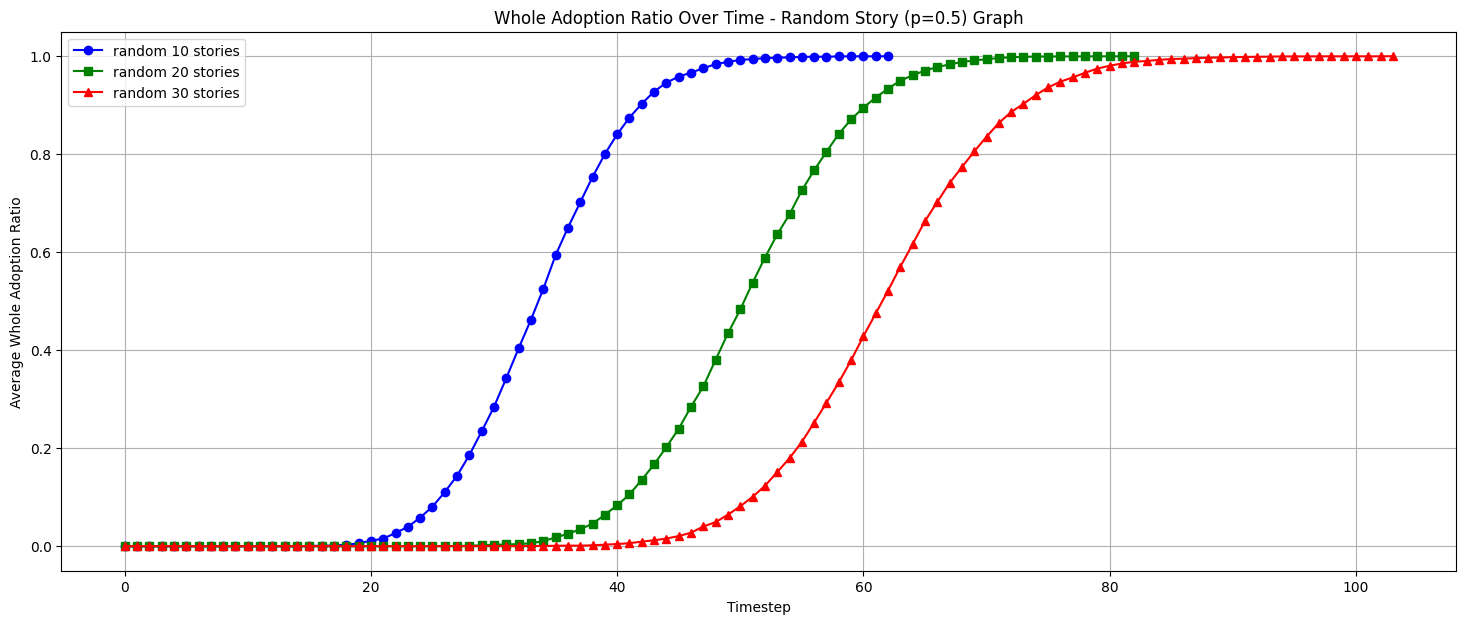

In [11]:
plt.figure(figsize=(18, 7))

plt.plot(random_10_05_data['timestep'], 
         random_10_05_data['whole_adoption_ratio'], 
         marker='o', color='blue', label='random 10 stories')

plt.plot(random_20_05_data['timestep'], 
         random_20_05_data['whole_adoption_ratio'], 
         marker='s', color='green', label='random 20 stories')

plt.plot(random_30_05_data['timestep'], 
         random_30_05_data['whole_adoption_ratio'], 
         marker='^', color='red', label='random 30 stories')

plt.title('Whole Adoption Ratio Over Time - Random Story (p=0.5) Graph')
plt.xlabel('Timestep')
plt.ylabel('Average Whole Adoption Ratio')
plt.grid(True)
plt.legend()
plt.show()

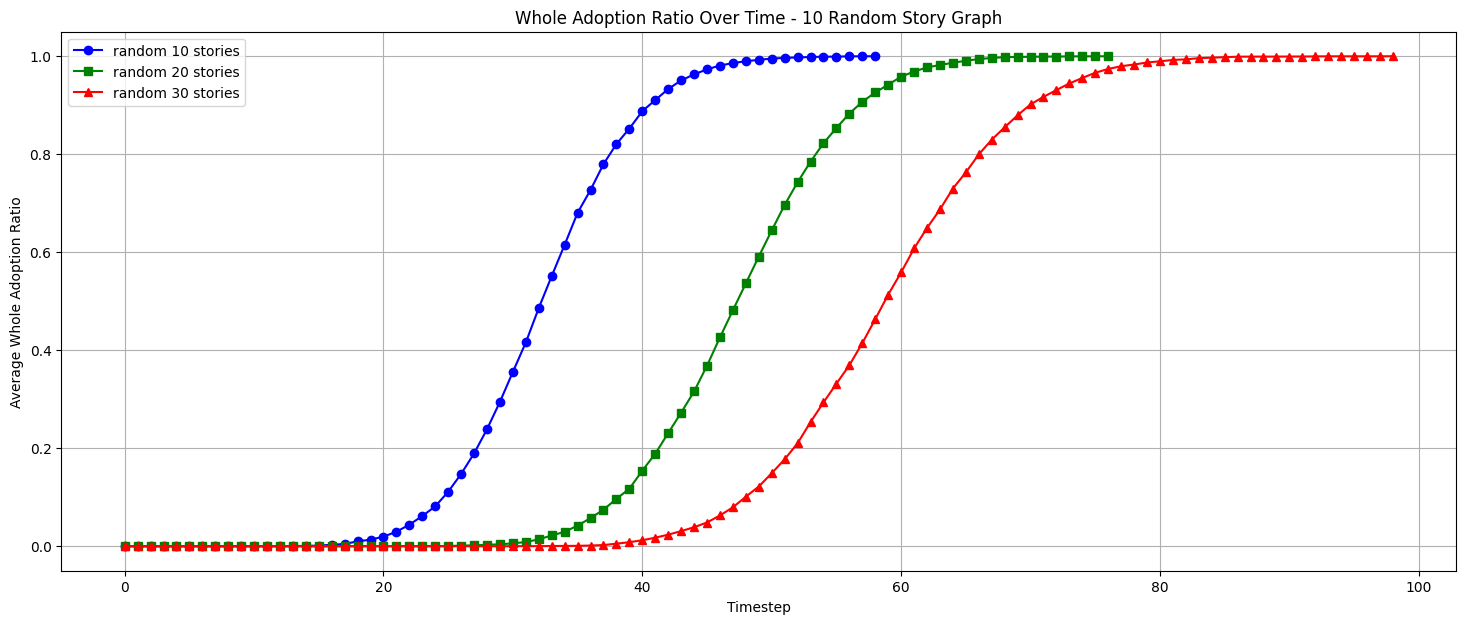

In [12]:
plt.figure(figsize=(18, 7))

plt.plot(random_10_07_data['timestep'], 
         random_10_07_data['whole_adoption_ratio'], 
         marker='o', color='blue', label='random 10 stories')

plt.plot(random_20_07_data['timestep'], 
         random_20_07_data['whole_adoption_ratio'], 
         marker='s', color='green', label='random 20 stories')

plt.plot(random_30_07_data['timestep'], 
         random_30_07_data['whole_adoption_ratio'], 
         marker='^', color='red', label='random 30 stories')

plt.title('Whole Adoption Ratio Over Time - 10 Random Story Graph')
plt.xlabel('Timestep')
plt.ylabel('Average Whole Adoption Ratio')
plt.grid(True)
plt.legend()
plt.show()

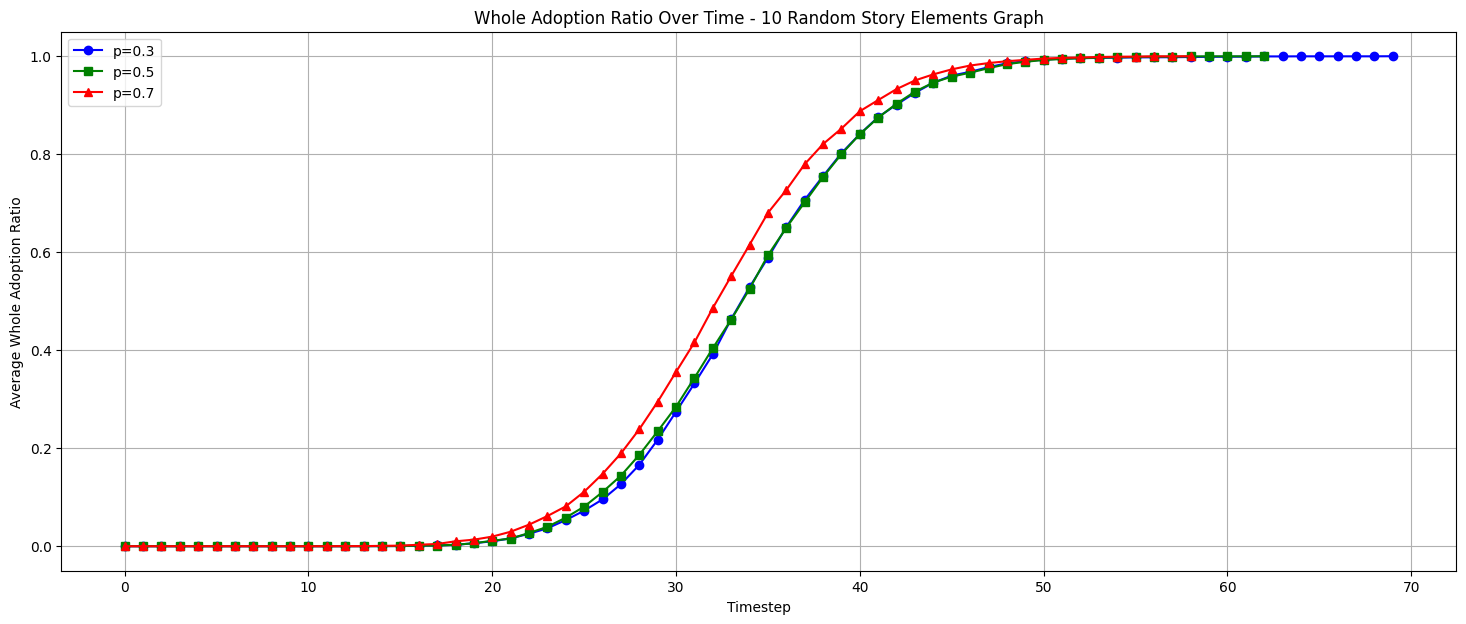

In [13]:
plt.figure(figsize=(18, 7))

plt.plot(random_10_03_data['timestep'], 
         random_10_03_data['whole_adoption_ratio'], 
         marker='o', color='blue', label='p=0.3')

plt.plot(random_10_05_data['timestep'], 
         random_10_05_data['whole_adoption_ratio'], 
         marker='s', color='green', label='p=0.5')

plt.plot(random_10_07_data['timestep'], 
         random_10_07_data['whole_adoption_ratio'], 
         marker='^', color='red', label='p=0.7')

plt.title('Whole Adoption Ratio Over Time - 10 Random Story Elements Graph')
plt.xlabel('Timestep')
plt.ylabel('Average Whole Adoption Ratio')
plt.grid(True)
plt.legend()
plt.show()

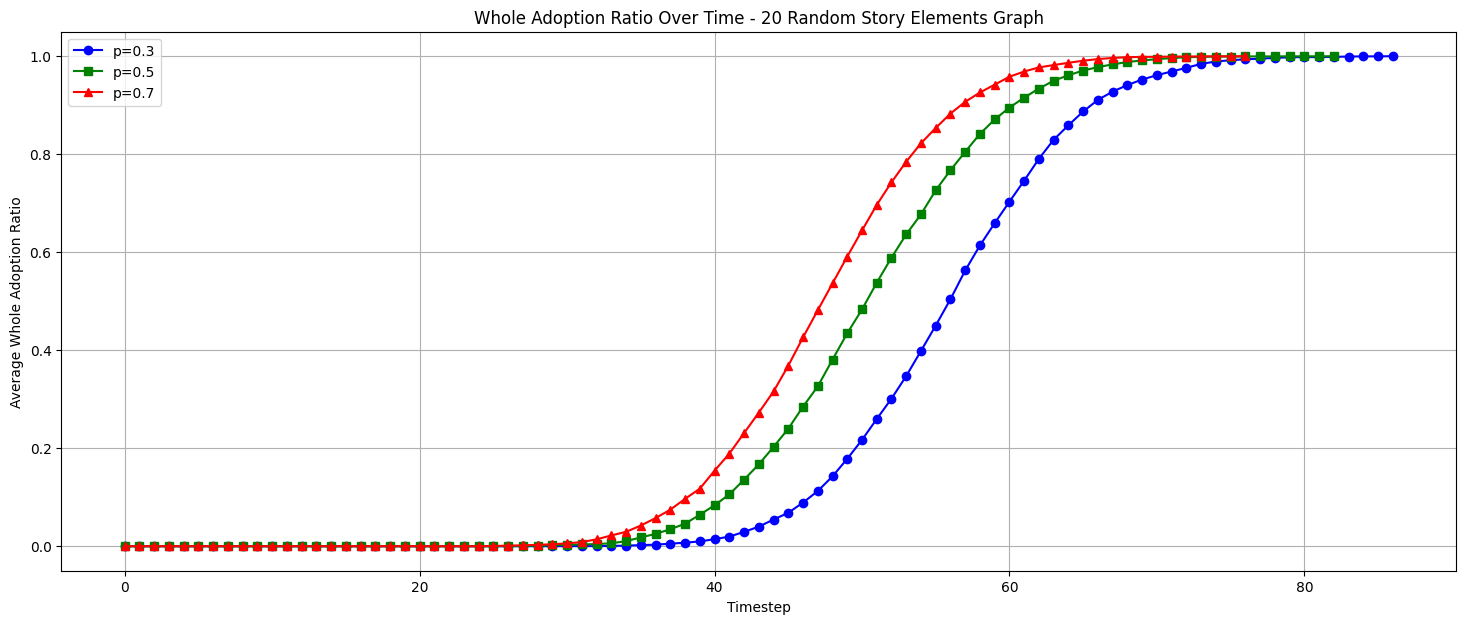

In [14]:
plt.figure(figsize=(18, 7))

plt.plot(random_20_03_data['timestep'], 
         random_20_03_data['whole_adoption_ratio'], 
         marker='o', color='blue', label='p=0.3')

plt.plot(random_20_05_data['timestep'], 
         random_20_05_data['whole_adoption_ratio'], 
         marker='s', color='green', label='p=0.5')

plt.plot(random_20_07_data['timestep'], 
         random_20_07_data['whole_adoption_ratio'], 
         marker='^', color='red', label='p=0.7')

plt.title('Whole Adoption Ratio Over Time - 20 Random Story Elements Graph')
plt.xlabel('Timestep')
plt.ylabel('Average Whole Adoption Ratio')
plt.grid(True)
plt.legend()
plt.show()

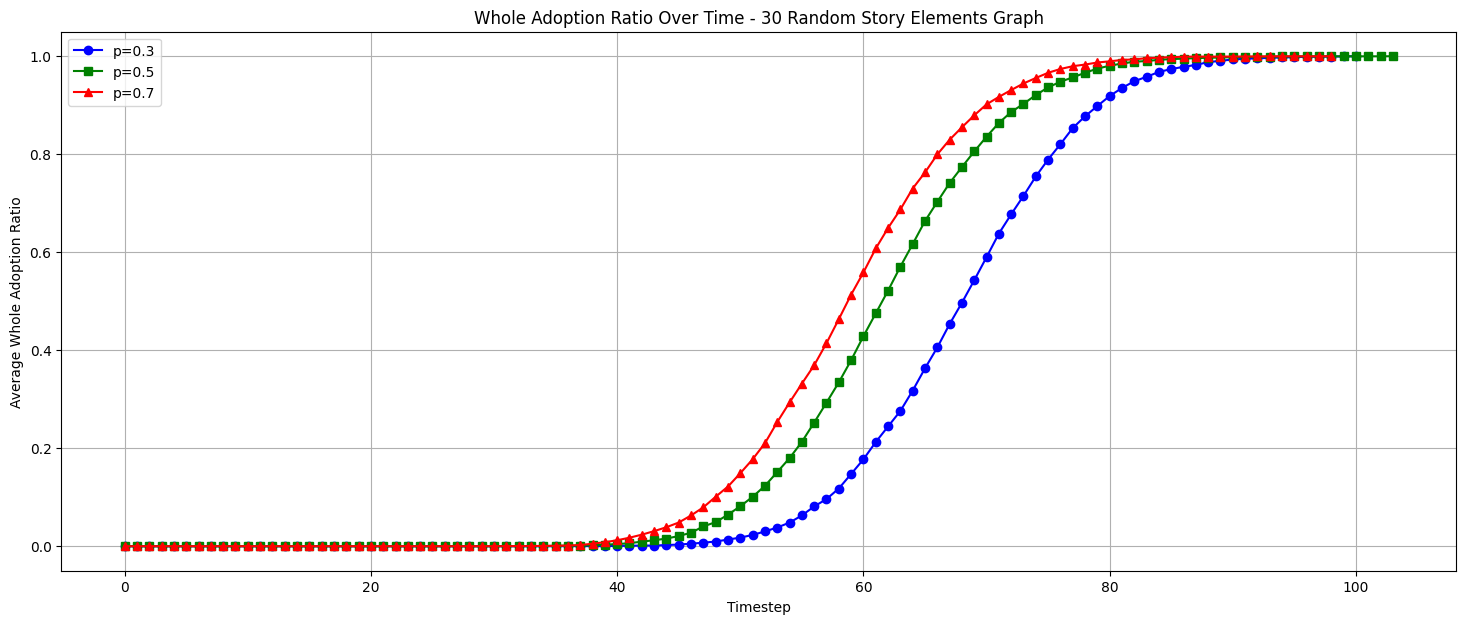

In [15]:
plt.figure(figsize=(18, 7))

plt.plot(random_30_03_data['timestep'], 
         random_30_03_data['whole_adoption_ratio'], 
         marker='o', color='blue', label='p=0.3')

plt.plot(random_30_05_data['timestep'], 
         random_30_05_data['whole_adoption_ratio'], 
         marker='s', color='green', label='p=0.5')

plt.plot(random_30_07_data['timestep'], 
         random_30_07_data['whole_adoption_ratio'], 
         marker='^', color='red', label='p=0.7')

plt.title('Whole Adoption Ratio Over Time - 30 Random Story Elements Graph')
plt.xlabel('Timestep')
plt.ylabel('Average Whole Adoption Ratio')
plt.grid(True)
plt.legend()
plt.show()

In [16]:
# Define the logistic function
def logistic_function(x, L, k, x0):
    return L / (1 + np.exp(-k * (x - x0)))

# Fit the logistic function to the data
def fit_logistic(x_data, y_data):
    # Initial parameter guess, just to kick off the optimization
    initial_guess = [max(y_data), 1, np.median(x_data)]
    
    # Use curve_fit to fit the model
    params, _ = curve_fit(logistic_function, x_data, y_data, p0=initial_guess)
    
    return params

# Function to process a dataframe and return the results
def process_dataframe(df, model_name):
    # Fit the logistic function to the data
    params = fit_logistic(df['timestep'], df['whole_adoption_ratio'])
    
    # Calculate the slope at the inflection point
    slope = params[0] * params[1] / 4
    
    # Return the results as a dictionary
    return {
        'model_name': model_name,
        'inflection_point_slope': slope,
        'L': params[0],
        'k': params[1],
        'x0': params[2]
    }

# List of your dataframe variables
dataframe_names = ["linear_10stories_data", "linear_20stories_data", "linear_30stories_data",
                   "binary_10stories_data", "binary_20stories_data", "binary_30stories_data",
                   "ternary_10stories_data", "ternary_20stories_data", "ternary_30stories_data",
                   "star_10stories_data", "star_20stories_data", "star_30stories_data",
                   "random_10_03_data", "random_20_03_data", "random_30_03_data",
                   "random_10_05_data", "random_20_05_data", "random_30_05_data",
                   "random_10_07_data", "random_20_07_data", "random_30_07_data"
                  ]

# Dictionary to hold the processed data
results = []

# Iterate over the dataframes
for dataframe_name in dataframe_names:
    # Assuming each dataframe variable is named in a consistent format and is already in your namespace
    df = eval(dataframe_name)
    results.append(process_dataframe(df, dataframe_name))

# Create a new DataFrame to hold all the results
results_df = pd.DataFrame(results)

In [17]:
results_df

,model_name,inflection_point_slope,L,k,x0
0,linear_10stories_data,0.062096,0.998877,0.248662,37.946324
1,linear_20stories_data,0.050392,1.002263,0.201113,69.648906
2,linear_30stories_data,0.041688,1.003890,0.166106,100.009534
3,binary_10stories_data,0.063637,0.998690,0.254884,37.823735
4,binary_20stories_data,0.050507,1.002421,0.201541,66.842574
5,binary_30stories_data,0.043679,1.006427,0.173600,93.503267
6,ternary_10stories_data,0.061436,0.998875,0.246022,37.382383
7,ternary_20stories_data,0.050978,1.000809,0.203749,64.817848
8,ternary_30stories_data,0.044581,1.003324,0.177735,89.188934
9,star_10stories_data,0.064503,0.999188,0.258223,38.500271
